# This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
.Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression



In [2]:
# Importing neccessary Libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('avocado.csv')
df.head(5)# Checking the Values.

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.tail(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
# To Checkthe Dataset shape
df.shape

(18249, 14)

In [7]:
# We have 18249 rows and 14 columns.

In [8]:
# To check the info about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [9]:
#Observations:
#we can see float values in 9 columns
# we can see 03 object values in the dataset.

In [10]:
#To check the all the columns
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [11]:
# Unnamed: 0 columns to be removed,as it is unnecessary in the dataset.
# Date : the Date of observation is given (object type needs to be converted.)
#'Average Price': The Average price of a single av0cado given in float values.("Our Target Variable")
#Total Volume: The total volume of avocados sold
#4046-Type of avacadoes sold with plu code4046
#4225 - Total number of avocados with PLU 4225 sold
#4770 - Total number of avocados with PLU 4770 sold
#Total Bags-Total number of Bags(Avocado sold.)
# small bags-Total Number of small Bags sold.
# Large Bags-Total Number of Large Bags sold.
# Xlarge Bags-Total number of xlarge Bags sold.
# 'type '-Type of Avocadoes sold.
# year  -The Year of manufacturing.
#Region-The region where avocadoes sold.("Our Target Variable as well.")

# data integrity check.

In [12]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [13]:
# To check any widespace,special characters in the Dataset.
df.isin(['NA','n/a','-',',','?',' ','nan','@']).any().sum()

0

In [14]:
# The Dataset doesnot contains no special characters.

In [15]:
# Removing the column ['Unnamed: 0'] from the Dataset,as this is unnecessary column
df.drop(columns='Unnamed: 0',axis=1,inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [16]:
# To Check the Unique values present in the columns
print("The Total Number of Unique Values present in the column :",df['Date'].nunique())
df['Date'].unique()

The Total Number of Unique Values present in the column : 169


array(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
       '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
       '2015-11-01', '2015-10-25', '2015-10-18', '2015-10-11',
       '2015-10-04', '2015-09-27', '2015-09-20', '2015-09-13',
       '2015-09-06', '2015-08-30', '2015-08-23', '2015-08-16',
       '2015-08-09', '2015-08-02', '2015-07-26', '2015-07-19',
       '2015-07-12', '2015-07-05', '2015-06-28', '2015-06-21',
       '2015-06-14', '2015-06-07', '2015-05-31', '2015-05-24',
       '2015-05-17', '2015-05-10', '2015-05-03', '2015-04-26',
       '2015-04-19', '2015-04-12', '2015-04-05', '2015-03-29',
       '2015-03-22', '2015-03-15', '2015-03-08', '2015-03-01',
       '2015-02-22', '2015-02-15', '2015-02-08', '2015-02-01',
       '2015-01-25', '2015-01-18', '2015-01-11', '2015-01-04',
       '2016-12-25', '2016-12-18', '2016-12-11', '2016-12-04',
       '2016-11-27', '2016-11-20', '2016-11-13', '2016-11-06',
       '2016-10-30', '2016-10-23', '2016-10-16', '2016-

In [17]:
df['Date'].value_counts()

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64

In [18]:
print("The Total Number of Unique Values present in the column :",df['AveragePrice'].nunique())
df['AveragePrice'].unique()

The Total Number of Unique Values present in the column : 259


array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [19]:
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

In [20]:
print("The Total Number of Unique Values present in the column :",df['Total Volume'].nunique())
df['Total Volume'].unique()

The Total Number of Unique Values present in the column : 18237


array([ 64236.62,  54876.98, 118220.22, ...,  13766.76,  16205.22,
        17489.58])

In [21]:
df['Total Volume'].value_counts()

4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64

In [22]:
print("The Total Number of Unique Values present in the column :",df['4046'].nunique())
df['4046'].unique()

The Total Number of Unique Values present in the column : 17702


array([1036.74,  674.28,  794.7 , ..., 1191.92, 1527.63, 2894.77])

In [23]:
df['4046'].value_counts()

0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64

In [24]:
print("The Total Number of Unique Values present in the column :",df['4225'].nunique())
df['4225'].unique()

The Total Number of Unique Values present in the column : 18103


array([ 54454.85,  44638.81, 109149.67, ...,   2452.79,   2981.04,
         2356.13])

In [25]:
df['4225'].value_counts()

0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: 4225, Length: 18103, dtype: int64

In [26]:
print("The Total Number of Unique Values present in the column :",df['4770'].nunique())
df['4770'].unique()

The Total Number of Unique Values present in the column : 12071


array([ 48.16,  58.33, 130.5 , ..., 727.94, 727.01, 224.53])

In [27]:
df['4770'].value_counts()

0.00      5497
2.66         7
3.32         7
10.97        6
1.59         6
          ... 
547.08       1
155.87       1
72.01        1
128.06       1
224.53       1
Name: 4770, Length: 12071, dtype: int64

In [28]:
print("The Total Number of Unique Values present in the column :",df['Total Bags'].nunique())
df['Total Bags'].unique()

The Total Number of Unique Values present in the column : 18097


array([ 8696.87,  9505.56,  8145.35, ...,  9394.11, 10969.54, 12014.15])

In [29]:
df['Total Bags'].value_counts()

0.00         15
990.00        5
300.00        5
550.00        4
266.67        4
             ..
90196.05      1
130858.02     1
510679.10     1
84522.00      1
12014.15      1
Name: Total Bags, Length: 18097, dtype: int64

In [30]:
print("The Total Number of Unique Values present in the column :",df['Small Bags'].nunique())
df['Small Bags'].unique()

The Total Number of Unique Values present in the column : 17321


array([ 8603.62,  9408.07,  8042.21, ...,  9351.8 , 10919.54, 11988.14])

In [31]:
df['Small Bags'].value_counts()

0.00        159
203.33       11
223.33       10
533.33       10
123.33        8
           ... 
14002.00      1
32441.00      1
29560.96      1
22077.20      1
11988.14      1
Name: Small Bags, Length: 17321, dtype: int64

In [32]:
print("The Total Number of Unique Values present in the column :",df['Large Bags'].nunique())
df['Large Bags'].unique()

The Total Number of Unique Values present in the column : 15082


array([ 93.25,  97.49, 103.14, ..., 324.8 ,  42.31,  26.01])

In [33]:
df['Large Bags'].value_counts()

0.00          2370
3.33           187
6.67            78
10.00           47
4.44            38
              ... 
2528089.14       1
2287449.76       1
731388.25        1
673464.14        1
26.01            1
Name: Large Bags, Length: 15082, dtype: int64

In [34]:
print("The Total Number of Unique Values present in the column :",df['XLarge Bags'].nunique())
df['XLarge Bags'].unique()

The Total Number of Unique Values present in the column : 5588


array([  0.  ,  33.33, 104.17, ..., 228.27,  12.12,  24.18])

In [35]:
df['XLarge Bags'].value_counts()

0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: XLarge Bags, Length: 5588, dtype: int64

In [36]:
print("The Total Number of Unique Values present in the column :",df['type'].nunique())
df['type'].unique()

The Total Number of Unique Values present in the column : 2


array(['conventional', 'organic'], dtype=object)

In [37]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [38]:
print("The Total Number of Unique Values present in the column :",df['year'].nunique())
df['year'].unique()

The Total Number of Unique Values present in the column : 4


array([2015, 2016, 2017, 2018], dtype=int64)

In [39]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [40]:
print("The Total Number of Unique Values present in the column :",df['region'].nunique())
df['region'].unique()

The Total Number of Unique Values present in the column : 54


array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [41]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

# Statistical Summary.

In [42]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [43]:
# observations:
#count is same in all the columns.
# StD is high in xlbagd,which means skewness is present
# Max and 75% of the data is high in columns like Xlarge Bags,outliers is also present.
# will analyze through EDA.

# Converting the Date(object) type column into datetime datatype

In [44]:
df['Date']=pd.to_datetime(df['Date'])

In [45]:
df.info() # Now are our object Datetype is changed into Datetime type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [46]:
df['date_year']=df['Date'].dt.year # Seperating the year .
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,date_year
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2018
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,2018
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,2018
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,2018


In [47]:
df['date_month']=df['Date'].dt.month # seperating the Month
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,date_year,date_month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2018,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,2018,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,2018,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,2018,1


In [48]:
df['days']=df['Date'].dt.day # seperating the Days.
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,date_year,date_month,days
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2018,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,2018,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,2018,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,2018,1,14


In [49]:
# After seperated removing the Date column from the dataset.
df.drop(columns=['Date'],axis=1,inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,date_year,date_month,days
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,2018,1,14


In [50]:
# Since the Year column is like twice now,dropping the year column as well.

In [51]:
df.drop(columns=['year'],axis=1,inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,date_year,date_month,days
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


# categorising thecolumns before EDA

In [52]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region',
       'date_year', 'date_month', 'days'],
      dtype='object')

In [53]:
df_numerical=df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','date_year','date_month','days']].copy()
df_numerical

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,date_year,date_month,days
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14


In [54]:
df_categorical=df[['type','region']].copy()
df_categorical

,type,region
0,conventional,Albany
1,conventional,Albany
2,conventional,Albany
3,conventional,Albany
4,conventional,Albany
...,...,...
18244,organic,WestTexNewMexico
18245,organic,WestTexNewMexico
18246,organic,WestTexNewMexico
18247,organic,WestTexNewMexico


 # EDA

# Univariate Analysis.

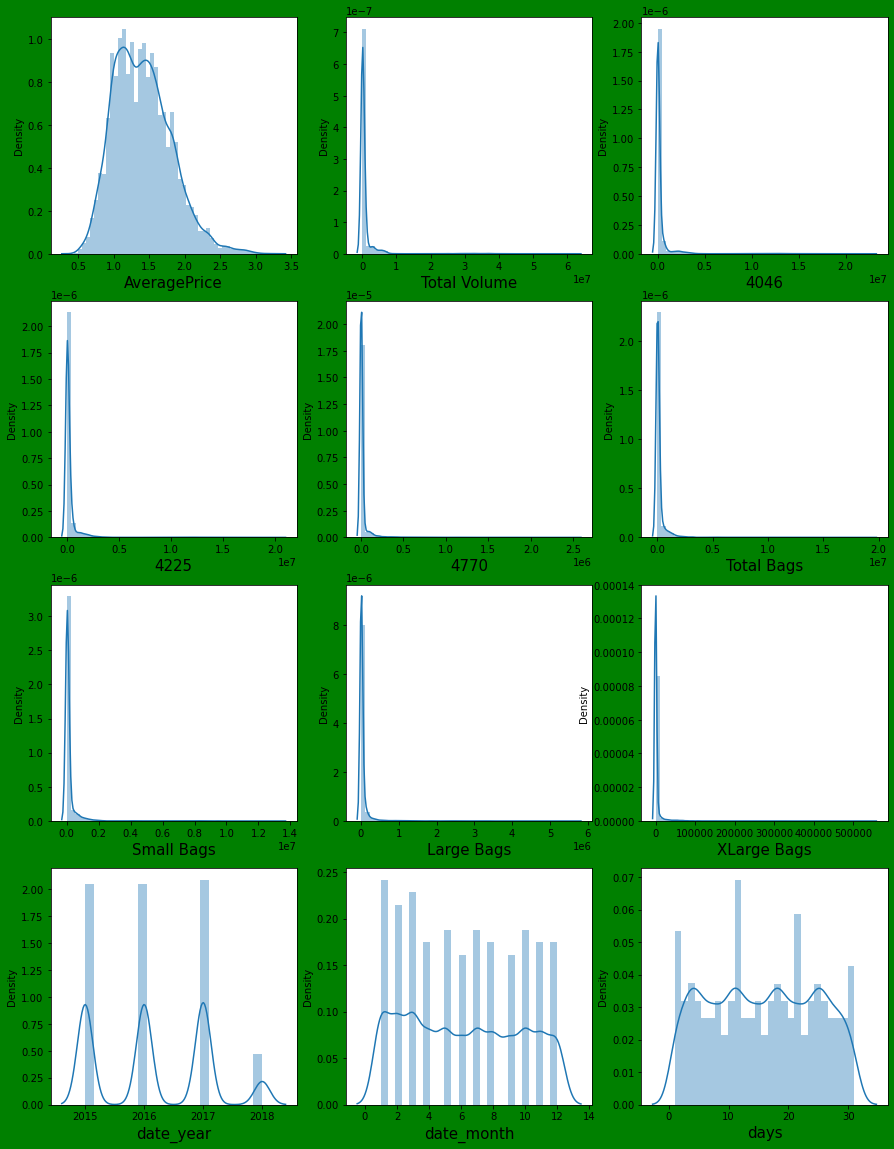

In [55]:
# Checking the Distribution of the numerical columns.

plt.figure(figsize=(15,20),facecolor='green')
plotnumber=1
for columns in df_numerical:
    if plotnumber<=12:
        plt.subplot(4,3,plotnumber)
        ax=sns.distplot(df_numerical[columns])
        plt.xlabel(columns,fontsize=15)
    plotnumber+=1
plt.show()

In [56]:
# observations:
#column['Average price']: The Data distribution  is normal distribution in the data range between(0.5 to 3)
# column['Totl Volume']: The Data distribution is normal distribution in the data ranges between (0 to 1),rightskewness is present
# column['4046']:The Data is normally distributed from 0.0 to 0.4,rightskewness is present.
# column['4225']:The Data is normally distributed from 0 to 0.4,right skewness is present.
# column['4770']:The Data is normally distributed from(0 to 0.4),right skewness is present.
# Same applies tocolumn['totalbags;normal distribution from 0 to 0.4right skewness is present
# column['Small Bags']normal distribution from 0 to 0.4right skewness is present
#column ['Large Bgas']normal distribution from 0 to 2right skewness is present
#column ['XLarge Bgas']normal distribution from 0 to100000 right skewness is present
#column['date_year']=normally distributef from 2015 to 2018
#column['Date_month']=normally distributed from 0 to 12
# column ['Days']=normally distributed from [0to 30]

conventional    9126
organic         9123
Name: type, dtype: int64


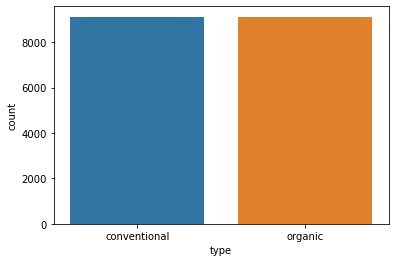

In [57]:
plt.figure()
print(df['type'].value_counts())
sns.countplot(x=df['type'])
plt.show()

In [58]:
#observations:
# 2 types of Avocadoes are sold,where conventional=9126 sold
# where organicsold=9123.

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

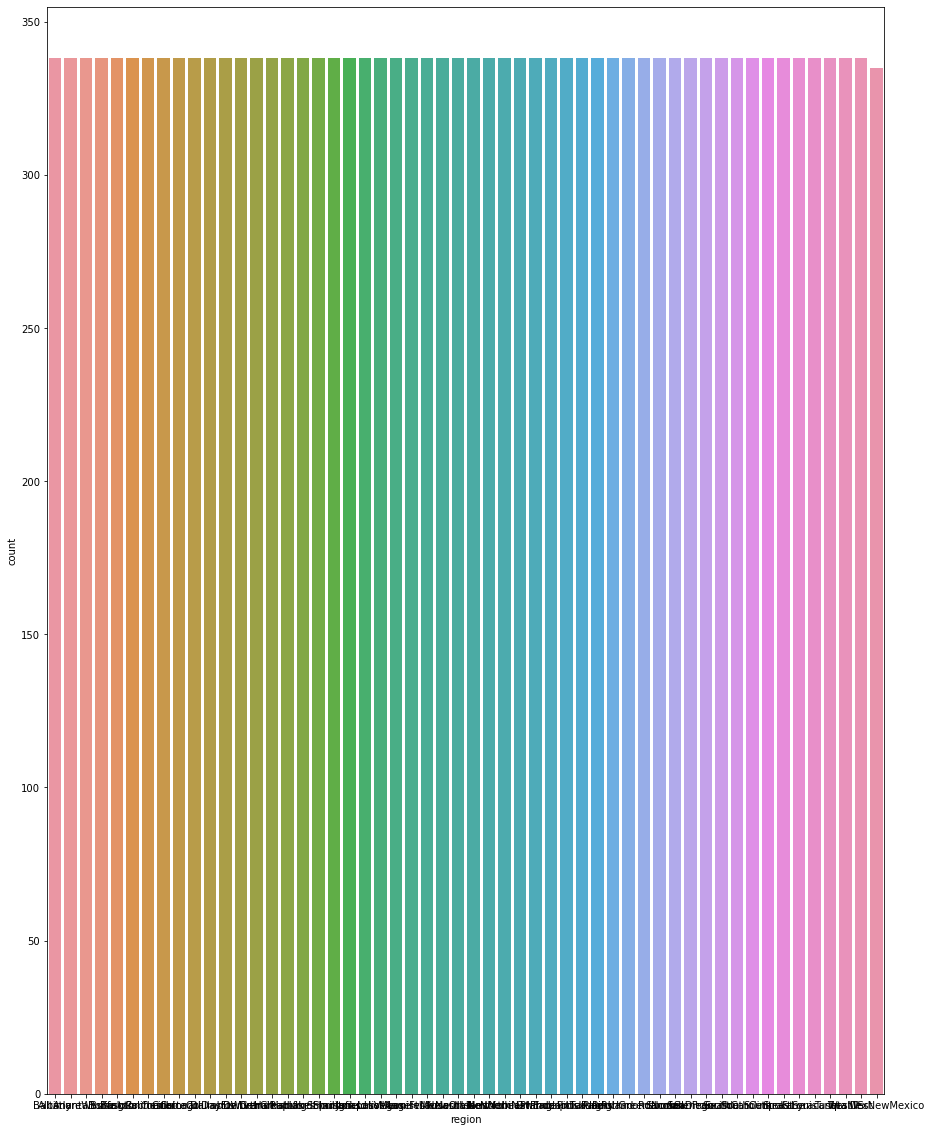

In [59]:
plt.figure(figsize=(15,20))
print(df['region'].value_counts())
sns.countplot(x=df['region'])
plt.show()

In [60]:
# Observations:
# Except West Text(335),New Mexico almost all region 338 Avocadoes sold in their region

# Bivariate Analysis

# relationship with Target Variable.

In [61]:
x=df.drop(columns=['AveragePrice'],axis=1)
x
         

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,date_year,date_month,days
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


In [62]:
y=df['AveragePrice']
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

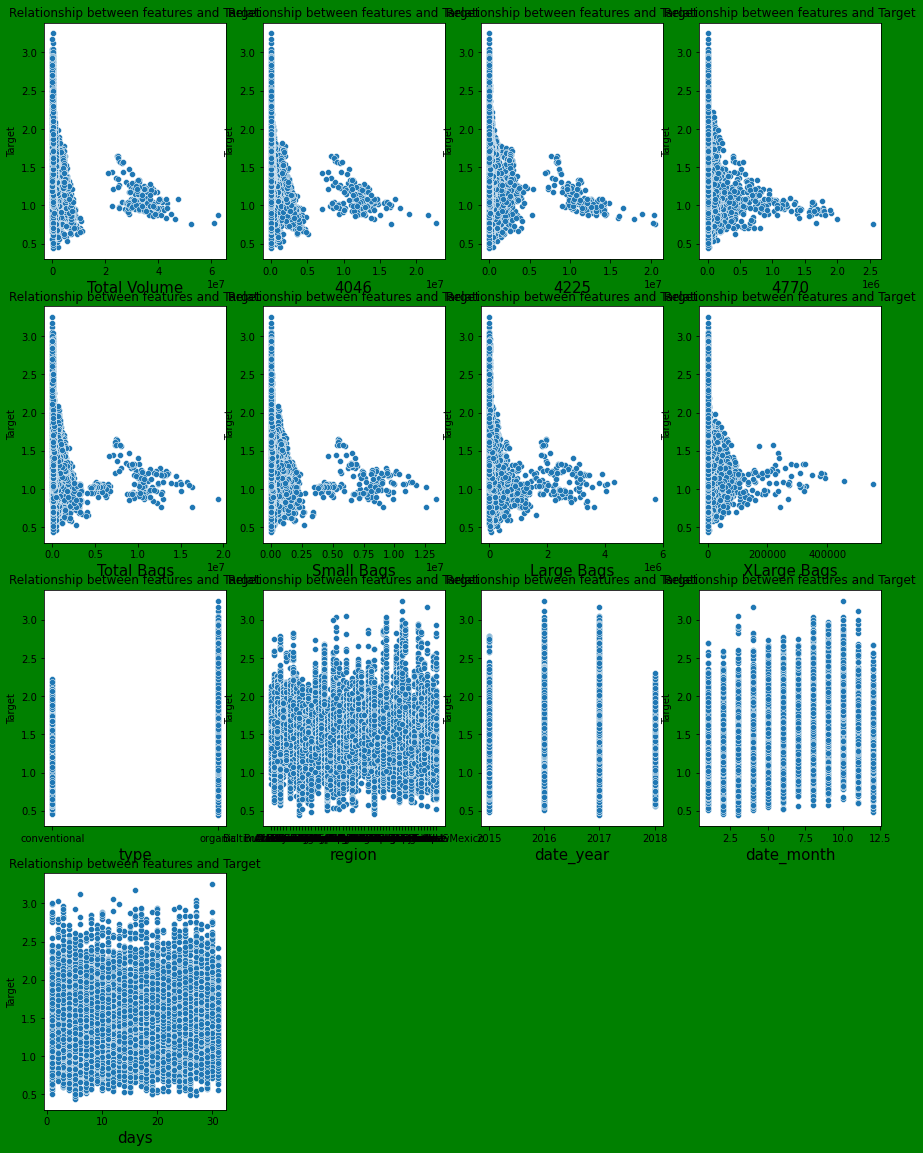

In [63]:
plt.figure(figsize=(15,20),facecolor='green')
plotnumber=1
for columns in x:
    if plotnumber<=13:
        plt.subplot(4,4,plotnumber)
        ax=sns.scatterplot(x=x[columns],y=y)
        plt.xlabel(columns,fontsize=15)
        plt.ylabel('Target')
        plt.title('Relationship between features and Target')
    plotnumber+=1
plt.show()

In [64]:
# Observations:
# Decrease in AveragePrice is seen when the Total Volume is increased.
# Decrease in Averageprice when productcode 4046 avacodes are sold more
# Decrease in Averageprice when productcode 4225 avacodes are sold more
# Decrease in Averageprice when productcode 4770 avacodes are sold more
# Total Bags the data is scattered.(Most of them in Increasing trend(0 to 1.5) )
# Small Bags also the data is scattered.(Most of them in Increasing trend(0 to 1))
# Large Bags also the data is scattered.(Most of them in Increasing trend(0 to 4))
# XLarge  Bags also the data is scattered.(Most of them in Increasing trend(0 to 400000))
# Type column,organic avacodes  Average Price valueis inincreasing pattern,
# In Region,the Data is scattered,
#In date_year,I can see the increasing trend(2015 to 2016)
# In date_year,i can see the decreasing trend(2017 to 2018)
# In date_month,the data is scattered.
# In days,the data is scattered.


# corelation with target variable.

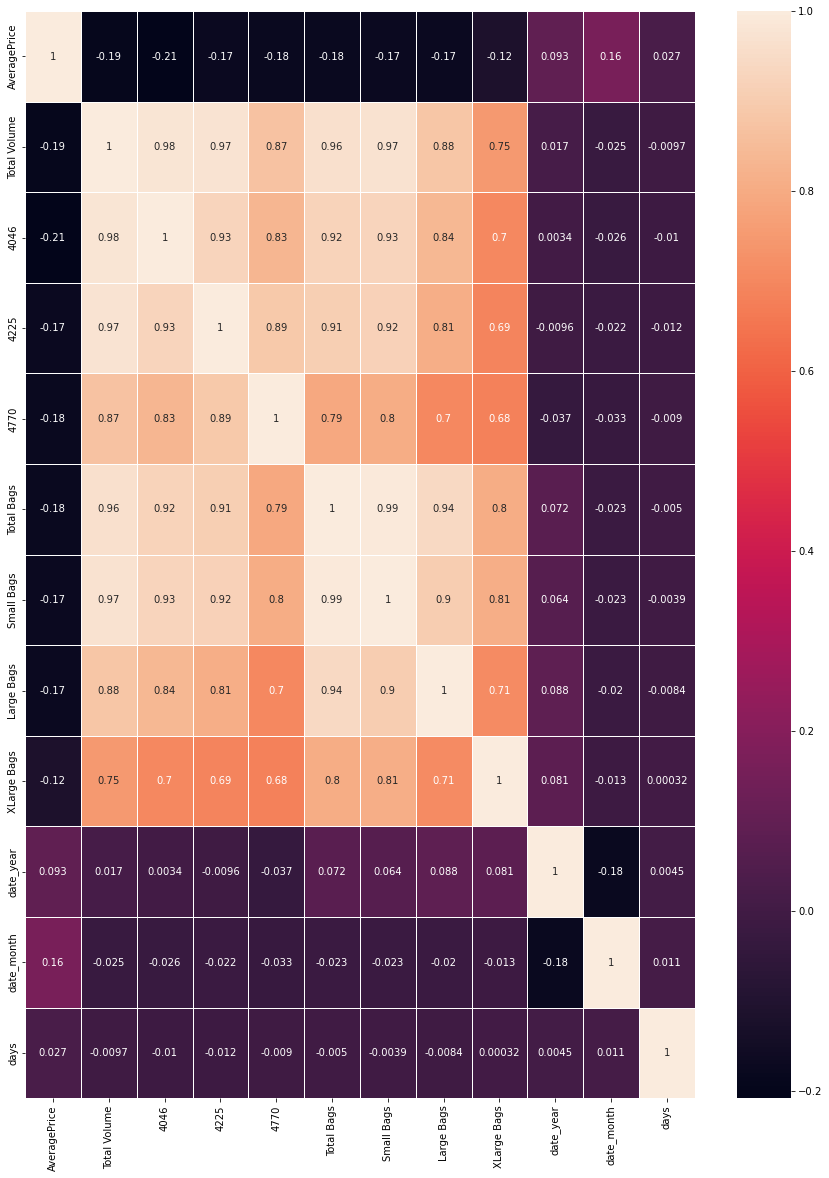

In [65]:
corr=df.corr()
plt.figure(figsize=(15,20))
sns.heatmap(data=corr,annot=True,linewidths=0.5)
plt.show()

In [66]:
corr['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
date_month      0.162409
date_year       0.093197
days            0.027386
XLarge Bags    -0.117592
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64

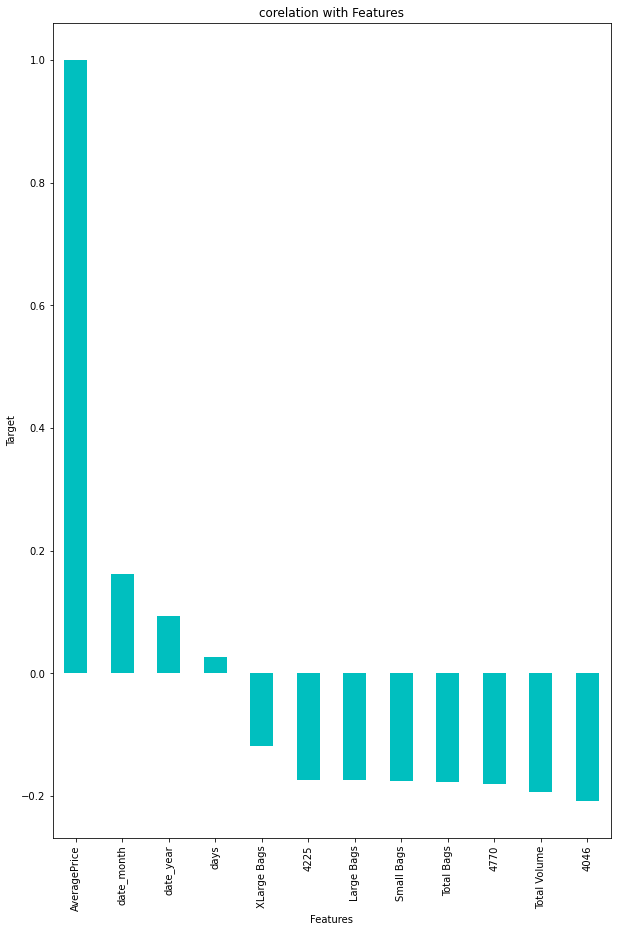

In [67]:
plt.figure(figsize=(10,15))
corr['AveragePrice'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('corelation with Features')
plt.show()

In [68]:
##observations:
#days column is contributing less to target, removing those column.
# Lots of Multicollinearity is there between the columns,checking the same with VIF further.

In [69]:
delete=pd.DataFrame([['days','0.02']],columns=[['columnname','corelation with Target']])
delete

,columnname,corelation with Target
0,days,0.02


In [70]:
df.drop(columns=['days'],axis=1,inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,date_year,date_month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1


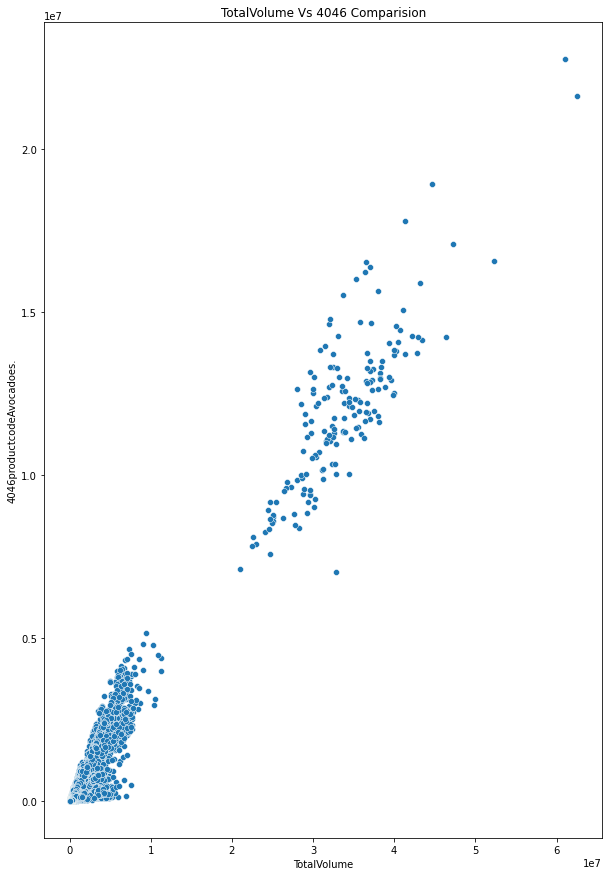

In [71]:
# seeing the scatter plot to check the relationship between two features.(as they have multicollinearity of 0.98)
plt.figure(figsize=(10,15))
sns.scatterplot(x=df['Total Volume'],y=df['4046'])
plt.xlabel('TotalVolume')
plt.ylabel('4046productcodeAvocadoes.')
plt.title('TotalVolume Vs 4046 Comparision')
plt.show()

In [72]:
# Observations:
# there is high relation between both columns.
# 4046 is contributing is -0.208 towards target.
# Hence removing 4646 column for multi collinearity.

In [73]:
df.drop(columns=['4046'],axis=1,inplace=True)
df

,AveragePrice,Total Volume,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,date_year,date_month
0,1.33,64236.62,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12
1,1.35,54876.98,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12
2,0.93,118220.22,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12
3,1.08,78992.15,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12
4,1.28,51039.60,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2
18245,1.71,13888.04,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1
18246,1.87,13766.76,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1
18247,1.93,16205.22,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1


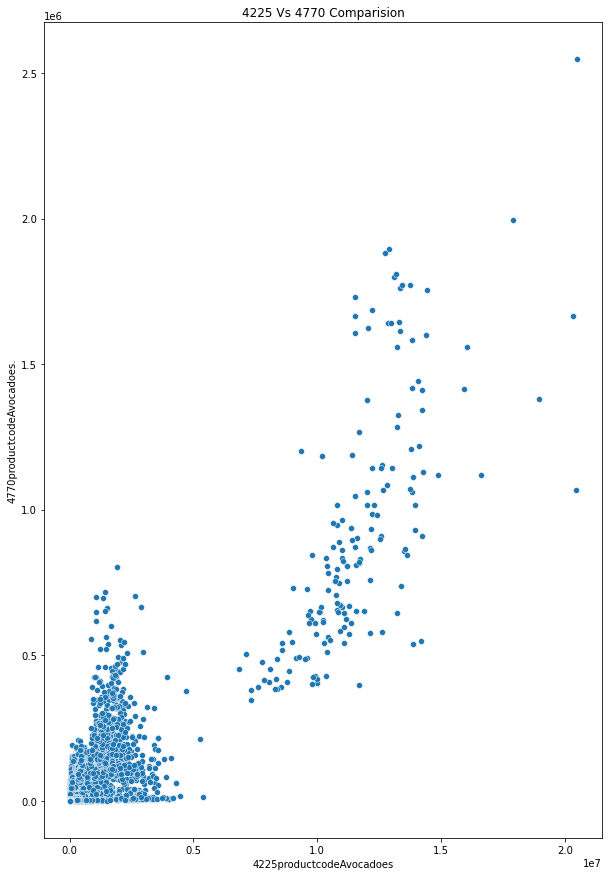

In [74]:
# seeing the scatter plot to check the relationship between two features.(as they have multicollinearity of 0.98)
plt.figure(figsize=(10,15))
sns.scatterplot(x=df['4225'],y=df['4770'])
plt.xlabel('4225productcodeAvocadoes')
plt.ylabel('4770productcodeAvocadoes.')
plt.title('4225 Vs 4770 Comparision')
plt.show()

In [75]:
# Observations:
# there is high relation between both columns.
# 4225 (-0.172) is contributing is  towards target.
# 4770 is also contributing(-0.179) towards target
# Hence removing 4770 column for multi collinearity (which gives less contribution towards target.)

In [76]:
df.drop(columns=['4770'],axis=1,inplace=True) # Dropped the column 4770.
df

,AveragePrice,Total Volume,4225,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,date_year,date_month
0,1.33,64236.62,54454.85,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12
1,1.35,54876.98,44638.81,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12
2,0.93,118220.22,109149.67,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12
3,1.08,78992.15,71976.41,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12
4,1.28,51039.60,43838.39,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,1529.20,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2
18245,1.71,13888.04,3431.50,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1
18246,1.87,13766.76,2452.79,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1
18247,1.93,16205.22,2981.04,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1


In [77]:
# Remaining we will check the values using VIF.

# Encoding categorical columns.

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
le=LabelEncoder()

In [80]:
type=le.fit_transform(df['type'])
type

array([0, 0, 0, ..., 1, 1, 1])

In [81]:
df['type']=type

In [82]:
df

,AveragePrice,Total Volume,4225,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,date_year,date_month
0,1.33,64236.62,54454.85,8696.87,8603.62,93.25,0.0,0,Albany,2015,12
1,1.35,54876.98,44638.81,9505.56,9408.07,97.49,0.0,0,Albany,2015,12
2,0.93,118220.22,109149.67,8145.35,8042.21,103.14,0.0,0,Albany,2015,12
3,1.08,78992.15,71976.41,5811.16,5677.40,133.76,0.0,0,Albany,2015,12
4,1.28,51039.60,43838.39,6183.95,5986.26,197.69,0.0,0,Albany,2015,11
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,1529.20,13498.67,13066.82,431.85,0.0,1,WestTexNewMexico,2018,2
18245,1.71,13888.04,3431.50,9264.84,8940.04,324.80,0.0,1,WestTexNewMexico,2018,1
18246,1.87,13766.76,2452.79,9394.11,9351.80,42.31,0.0,1,WestTexNewMexico,2018,1
18247,1.93,16205.22,2981.04,10969.54,10919.54,50.00,0.0,1,WestTexNewMexico,2018,1


In [83]:
region=le.fit_transform(df['region'])
region

array([ 0,  0,  0, ..., 53, 53, 53])

In [84]:
df['region']=region

In [85]:
df

,AveragePrice,Total Volume,4225,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,date_year,date_month
0,1.33,64236.62,54454.85,8696.87,8603.62,93.25,0.0,0,0,2015,12
1,1.35,54876.98,44638.81,9505.56,9408.07,97.49,0.0,0,0,2015,12
2,0.93,118220.22,109149.67,8145.35,8042.21,103.14,0.0,0,0,2015,12
3,1.08,78992.15,71976.41,5811.16,5677.40,133.76,0.0,0,0,2015,12
4,1.28,51039.60,43838.39,6183.95,5986.26,197.69,0.0,0,0,2015,11
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,1529.20,13498.67,13066.82,431.85,0.0,1,53,2018,2
18245,1.71,13888.04,3431.50,9264.84,8940.04,324.80,0.0,1,53,2018,1
18246,1.87,13766.76,2452.79,9394.11,9351.80,42.31,0.0,1,53,2018,1
18247,1.93,16205.22,2981.04,10969.54,10919.54,50.00,0.0,1,53,2018,1


# selecting Best Features using KBest Method.

In [86]:
x=df.drop(columns=['AveragePrice'],axis=1)
x

,Total Volume,4225,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,date_year,date_month
0,64236.62,54454.85,8696.87,8603.62,93.25,0.0,0,0,2015,12
1,54876.98,44638.81,9505.56,9408.07,97.49,0.0,0,0,2015,12
2,118220.22,109149.67,8145.35,8042.21,103.14,0.0,0,0,2015,12
3,78992.15,71976.41,5811.16,5677.40,133.76,0.0,0,0,2015,12
4,51039.60,43838.39,6183.95,5986.26,197.69,0.0,0,0,2015,11
...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,1529.20,13498.67,13066.82,431.85,0.0,1,53,2018,2
18245,13888.04,3431.50,9264.84,8940.04,324.80,0.0,1,53,2018,1
18246,13766.76,2452.79,9394.11,9351.80,42.31,0.0,1,53,2018,1
18247,16205.22,2981.04,10969.54,10919.54,50.00,0.0,1,53,2018,1


In [87]:
y=df['AveragePrice']
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [88]:
# To Select the Best Features Using SelectK Best Method.
from sklearn.feature_selection import SelectKBest, f_classif

In [89]:
best_feature=SelectKBest(score_func=f_classif,k='all')
fit=best_feature.fit(x,y)
score=pd.DataFrame(fit.scores_)
columns=pd.DataFrame(x.columns)
best_score=pd.concat([score,columns],axis=1)
best_score.columns=['score','columnname']
best_score

,score,columnname
0,4.122370,Total Volume
1,3.508901,4225
2,3.373669,Total Bags
3,3.331022,Small Bags
4,3.269397,Large Bags
5,1.746996,XLarge Bags
6,53.269112,type
7,1.334940,region
8,3.056698,date_year
9,3.051554,date_month


In [90]:
best_score.sort_values('score',ascending=False)

,score,columnname
6,53.269112,type
0,4.122370,Total Volume
1,3.508901,4225
2,3.373669,Total Bags
3,3.331022,Small Bags
4,3.269397,Large Bags
8,3.056698,date_year
9,3.051554,date_month
5,1.746996,XLarge Bags
7,1.334940,region


In [91]:
# Not dropping any column,continuing further with the same Dataset.

# skewness check


In [92]:

df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4225             8.942466
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
region           0.000030
date_year        0.215339
date_month       0.106617
dtype: float64

In [93]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
df_pwr=pt.fit_transform(df)
df_tra=pd.DataFrame(data=df_pwr,columns=df.columns)
# Checking skeweness and arranging the values in descending order
df_tra.skew().sort_values(ascending=False)

XLarge Bags     0.793520
date_year       0.213156
Total Volume    0.011171
Small Bags      0.007058
AveragePrice    0.005596
type            0.000329
Total Bags     -0.001626
4225           -0.017740
Large Bags     -0.073809
date_month     -0.146584
region         -0.261443
dtype: float64

In [94]:
# Observations:
# Power Transformer method removed the skewness,hence proceeding with the transformed dataset.


In [95]:
df_tra

,AveragePrice,Total Volume,4225,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,date_year,date_month
0,-0.086248,-0.086605,0.307313,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-2.011552,-1.221895,1.494347
1,-0.034022,-0.155746,0.231647,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-2.011552,-1.221895,1.494347
2,-1.273938,0.179327,0.579503,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-2.011552,-1.221895,1.494347
3,-0.793421,0.003876,0.415100,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-2.011552,-1.221895,1.494347
4,-0.219440,-0.187640,0.224806,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-2.011552,-1.221895,1.278438
...,...,...,...,...,...,...,...,...,...,...,...
18244,0.640729,-0.674587,-0.919470,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,1.543838,1.968548,-1.220706
18245,0.816307,-0.767550,-0.665372,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,1.543838,1.968548,-1.642047
18246,1.147790,-0.771505,-0.772496,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,1.543838,1.968548,-1.642047
18247,1.265876,-0.698077,-0.710543,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,1.543838,1.968548,-1.642047


# Outliers.

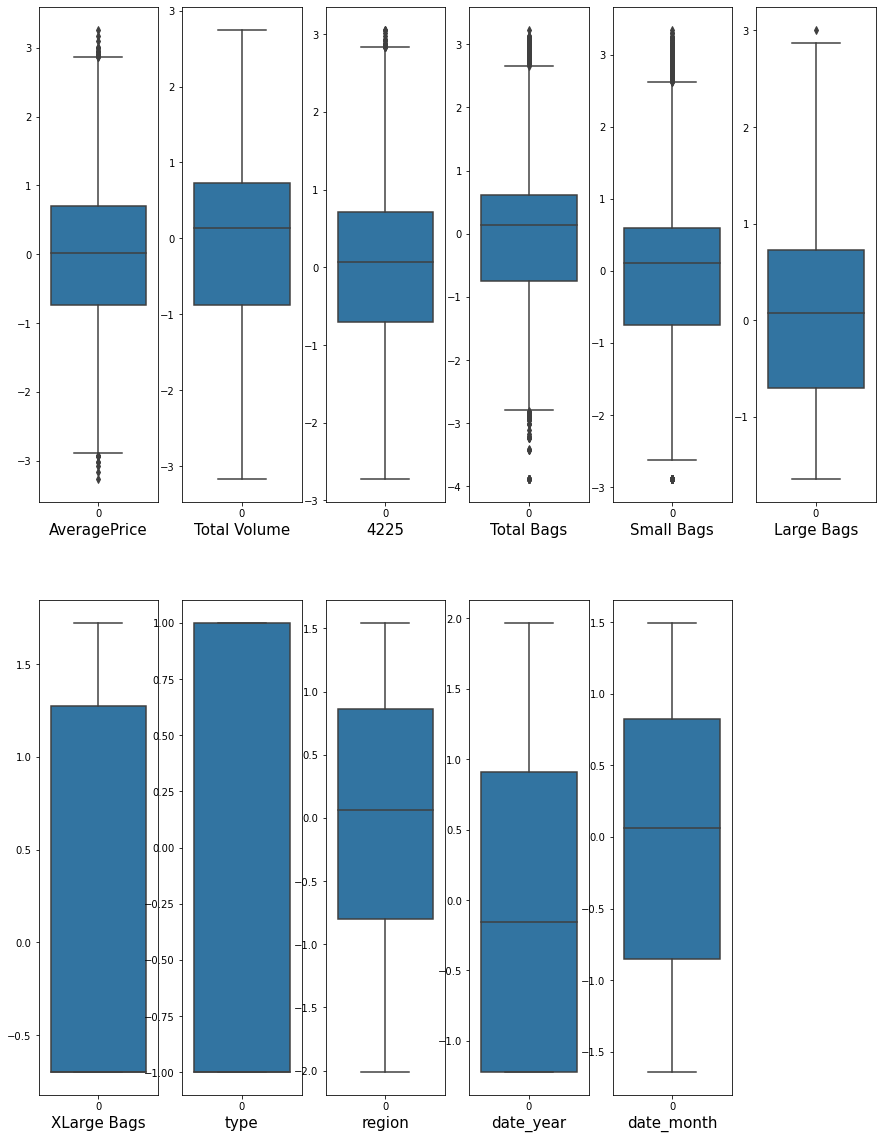

In [96]:
# Checking the outliers using boxplot.

plt.figure(figsize=(15,20))

plotnumber=1
for columns in df_tra :
    if plotnumber<=11:
        plt.subplot(2,6,plotnumber)
        ax=sns.boxplot(data=df_tra[columns])
        plt.xlabel(columns,fontsize=15)
    plotnumber+=1
plt.show()

In [97]:
# observations:
# found outliers in ['4225'],['Total Bags'],['Small Bags'] outliers are seen.


In [98]:
from scipy.stats import zscore 

In [99]:
z=np.abs(zscore(df_tra))
z

,AveragePrice,Total Volume,4225,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,date_year,date_month
0,0.086248,0.086605,0.307313,0.524004,0.340627,0.773351,0.699849,0.999836,2.011552,1.221879,1.494347
1,0.034022,0.155746,0.231647,0.485890,0.306425,0.763435,0.699849,0.999836,2.011552,1.221879,1.494347
2,1.273938,0.179327,0.579503,0.552018,0.366303,0.750820,0.699849,0.999836,2.011552,1.221879,1.494347
3,0.793421,0.003876,0.415100,0.695449,0.496853,0.691865,0.699849,0.999836,2.011552,1.221879,1.494347
4,0.219440,0.187640,0.224806,0.669157,0.477201,0.600975,0.699849,0.999836,2.011552,1.221879,1.278438
...,...,...,...,...,...,...,...,...,...,...,...
18244,0.640729,0.674587,0.919470,0.334466,0.178839,0.410859,0.699849,1.000164,1.543838,1.968564,1.220706
18245,0.816307,0.767550,0.665372,0.496897,0.325977,0.481465,0.699849,1.000164,1.543838,1.968564,1.642047
18246,1.147790,0.771505,0.772496,0.490952,0.308728,0.943486,0.699849,1.000164,1.543838,1.968564,1.642047
18247,1.265876,0.698077,0.710543,0.424252,0.248932,0.908510,0.699849,1.000164,1.543838,1.968564,1.642047


In [100]:
# will see where z>3.
np.where(z>3)

(array([ 1716,  2699,  5462,  5475,  5476,  5477,  5478,  5479,  5480,
         5481,  5482,  5483,  5484,  5485,  5486,  5487,  5488,  5489,
         5490,  5491,  5492,  5493,  5494,  5495,  5496,  5497,  5506,
         5506,  7412,  8319,  8322,  8344,  8344,  8345,  8345,  8346,
         8346,  8347,  8347,  8348,  8348,  8349,  8349,  8350,  8351,
         8352,  8352,  8353,  8353,  8354,  8354,  8355,  8356,  8357,
         8358,  8359,  8360,  8361,  8362,  8363,  8364,  8365,  8365,
         8366,  8366,  8366,  8367,  8367,  8368,  8369,  8370,  8371,
         9090,  9090,  9091,  9091,  9092,  9092,  9093,  9093,  9094,
         9094,  9095,  9096,  9096,  9097,  9097,  9097,  9097,  9098,
         9098,  9099,  9099,  9100,  9101,  9212,  9894, 10381, 11024,
        11320, 11321, 11322, 11325, 11326, 11332, 11333, 11336, 11338,
        11340, 11342, 11347, 11348, 11349, 11350, 11354, 11387, 11388,
        11594, 11595, 11596, 11597, 11614, 11662, 12132, 14124, 14125,
      

In [101]:
df_new=df_tra[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,4225,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,date_year,date_month
0,-0.086248,-0.086605,0.307313,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-2.011552,-1.221895,1.494347
1,-0.034022,-0.155746,0.231647,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-2.011552,-1.221895,1.494347
2,-1.273938,0.179327,0.579503,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-2.011552,-1.221895,1.494347
3,-0.793421,0.003876,0.415100,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-2.011552,-1.221895,1.494347
4,-0.219440,-0.187640,0.224806,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-2.011552,-1.221895,1.278438
...,...,...,...,...,...,...,...,...,...,...,...
18244,0.640729,-0.674587,-0.919470,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,1.543838,1.968548,-1.220706
18245,0.816307,-0.767550,-0.665372,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,1.543838,1.968548,-1.642047
18246,1.147790,-0.771505,-0.772496,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,1.543838,1.968548,-1.642047
18247,1.265876,-0.698077,-0.710543,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,1.543838,1.968548,-1.642047


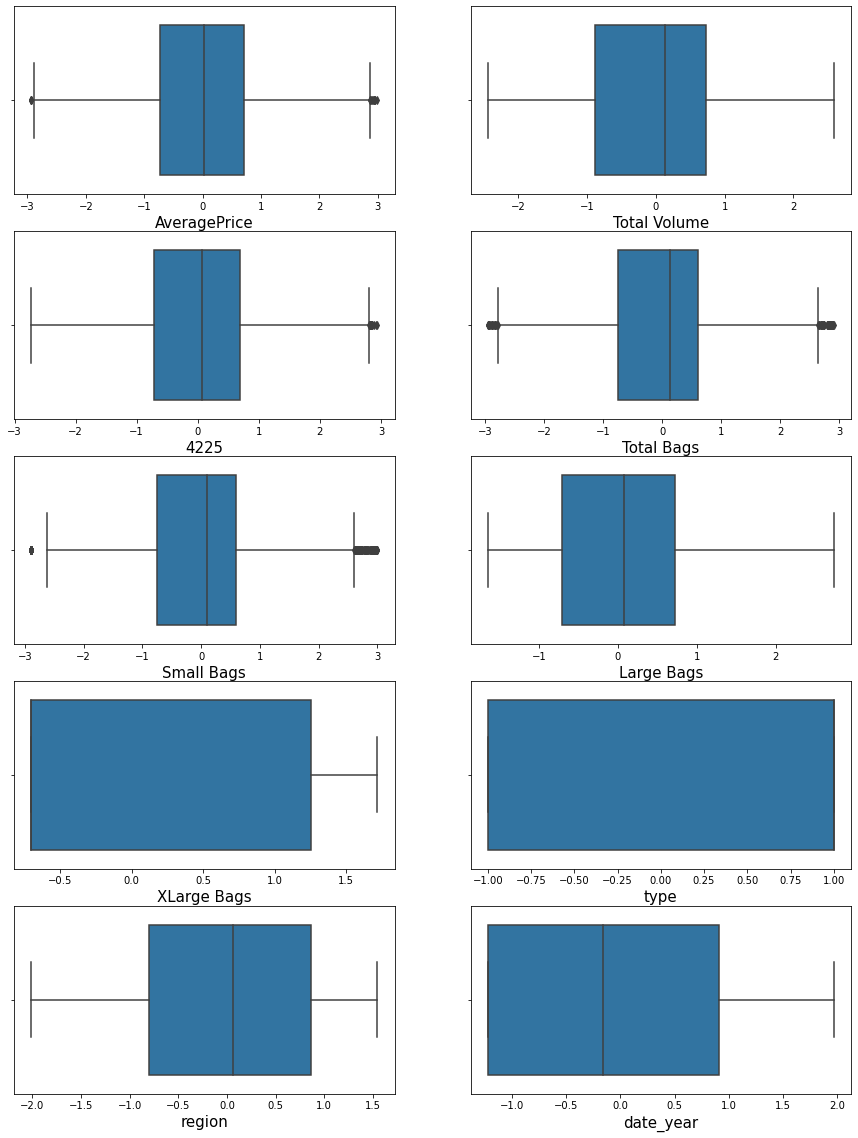

In [102]:
# Rechecking the outliers(after zscore method) by using BoxPlot.

plt.figure(figsize=(15,20))
plotnumber=1
for columns in df_new:
    if plotnumber<=10:
        plt.subplot(5,2,plotnumber)
        ax=sns.boxplot(df_new[columns])
        plt.xlabel(columns,fontsize=15)
    plotnumber+=1
plt.show()

In [103]:
print("OldDataframerows =",df_tra.shape[0])
print("NewDataFramerows =",df_new.shape[0])
print("Dataloss=",(df_tra.shape[0]-df_new.shape[0])/df_tra.shape[0]*100)

OldDataframerows = 18249
NewDataFramerows = 18141
Dataloss= 0.5918132500410981


In [104]:
# Using Zscore method to remove outliers as the dataloss is only 0.5%.

In [105]:
df_new.shape

(18141, 11)

# preprocessing

In [106]:
x=df_new.drop(columns=['AveragePrice'],axis=1)
x.shape

(18141, 10)

In [107]:
y=df_new['AveragePrice']
y

0       -0.086248
1       -0.034022
2       -1.273938
3       -0.793421
4       -0.219440
           ...   
18244    0.640729
18245    0.816307
18246    1.147790
18247    1.265876
18248    0.618287
Name: AveragePrice, Length: 18141, dtype: float64

In [108]:
y.shape

(18141,)

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.07965399,  0.32048989, -0.5318791 , ..., -2.00908622,
        -1.2214845 ,  1.49166268],
       [-0.14954635,  0.24389593, -0.4928095 , ..., -2.00908622,
        -1.2214845 ,  1.49166268],
       [ 0.18916999,  0.59602006, -0.56059484, ..., -2.00908622,
        -1.2214845 ,  1.49166268],
       ...,
       [-0.7720027 , -0.77256849, -0.49799845, ...,  1.55392625,
         1.97022938, -1.64262849],
       [-0.69777597, -0.7098553 , -0.4296265 , ...,  1.55392625,
         1.97022938, -1.64262849],
       [-0.66313547, -0.78540091, -0.38935054, ...,  1.55392625,
         1.97022938, -1.64262849]])

# checking the Multicollinearity using VIF

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [112]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Columns']=x.columns
vif

,VIF,Columns
0,28.802076,Total Volume
1,8.441874,4225
2,30.636744,Total Bags
3,14.768702,Small Bags
4,3.314906,Large Bags
5,2.074180,XLarge Bags
6,3.352460,type
7,1.042352,region
8,1.305424,date_year
9,1.054159,date_month


In [113]:
# Observations:
# Removing the column TotalBags  as the Vif value is greater than 10 and the highest value.

In [114]:
x.drop(columns=['Total Bags'],axis=1,inplace=True)
x

,Total Volume,4225,Small Bags,Large Bags,XLarge Bags,type,region,date_year,date_month
0,-0.086605,0.307313,-0.340627,-0.773351,-0.699849,-0.999836,-2.011552,-1.221895,1.494347
1,-0.155746,0.231647,-0.306425,-0.763435,-0.699849,-0.999836,-2.011552,-1.221895,1.494347
2,0.179327,0.579503,-0.366303,-0.750820,-0.699849,-0.999836,-2.011552,-1.221895,1.494347
3,0.003876,0.415100,-0.496853,-0.691865,-0.699849,-0.999836,-2.011552,-1.221895,1.494347
4,-0.187640,0.224806,-0.477201,-0.600975,-0.699849,-0.999836,-2.011552,-1.221895,1.278438
...,...,...,...,...,...,...,...,...,...
18244,-0.674587,-0.919470,-0.178839,-0.410859,-0.699849,1.000164,1.543838,1.968548,-1.220706
18245,-0.767550,-0.665372,-0.325977,-0.481465,-0.699849,1.000164,1.543838,1.968548,-1.642047
18246,-0.771505,-0.772496,-0.308728,-0.943486,-0.699849,1.000164,1.543838,1.968548,-1.642047
18247,-0.698077,-0.710543,-0.248932,-0.908510,-0.699849,1.000164,1.543838,1.968548,-1.642047


In [115]:
x_scaled=scaler.fit_transform(x)

In [116]:
x_scaled

array([[-0.07965399,  0.32048989, -0.34108203, ..., -2.00908622,
        -1.2214845 ,  1.49166268],
       [-0.14954635,  0.24389593, -0.30613156, ..., -2.00908622,
        -1.2214845 ,  1.49166268],
       [ 0.18916999,  0.59602006, -0.36732008, ..., -2.00908622,
        -1.2214845 ,  1.49166268],
       ...,
       [-0.7720027 , -0.77256849, -0.30848421, ...,  1.55392625,
         1.97022938, -1.64262849],
       [-0.69777597, -0.7098553 , -0.2473794 , ...,  1.55392625,
         1.97022938, -1.64262849],
       [-0.66313547, -0.78540091, -0.21024254, ...,  1.55392625,
         1.97022938, -1.64262849]])

In [117]:
#Rechecking The VIF after removing the column 'Total Bags' 

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Columns']=x.columns
vif

,VIF,Columns
0,21.386139,Total Volume
1,7.970890,4225
2,6.933137,Small Bags
3,2.171537,Large Bags
4,2.074160,XLarge Bags
5,3.315524,type
6,1.041675,region
7,1.251963,date_year
8,1.050249,date_month


In [118]:
#observations:
# we can continue with this x_Scaled for model Building

# Model Building.

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [120]:
# Importing train_test_split.

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
lr=LinearRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At Random State:",i)
        print("The Model Training score is:",r2_score(y_train,pred_train)*100)
        print("The Model Test score is :",r2_score(y_test,pred_test)*100)

At Random State: 139
The Model Training score is: 56.038364883296076
The Model Test score is : 56.044202574109434
At Random State: 171
The Model Training score is: 56.04960772283901
The Model Test score is : 56.01890498269242
At Random State: 193
The Model Training score is: 56.03441716459743
The Model Test score is : 56.03820455277584
At Random State: 225
The Model Training score is: 56.034992088415535
The Model Test score is : 55.98520833045071
At Random State: 241
The Model Training score is: 56.01636847422798
The Model Test score is : 55.97268561470932
At Random State: 249
The Model Training score is: 56.044265467743415
The Model Test score is : 56.00575725494708
At Random State: 260
The Model Training score is: 56.048561777632244
The Model Test score is : 55.991278737004976
At Random State: 263
The Model Training score is: 56.03712673116108
The Model Test score is : 56.018558038030704
At Random State: 347
The Model Training score is: 56.0185237289204
The Model Test score is : 55.9

In [123]:
# Observations:
# Choosing the Random state 980.


In [124]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=980)
lr.fit(x_train,y_train)

LinearRegression()

In [125]:
pred_test=lr.predict(x_test)
r2_score(y_test,pred_test)*100

56.00370920942179

In [126]:
mae=mean_absolute_error(y_test,pred_test)
mae

0.523142956007215

In [127]:
mse=mean_squared_error(y_test,pred_test)
mse

0.431613279334699

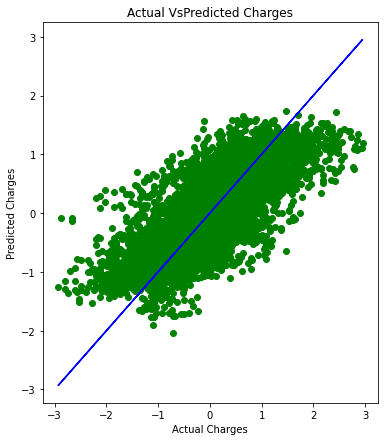

In [128]:
plt.figure(figsize=(6,7))
plt.scatter(x=y_test,y=pred_test,color='green')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual VsPredicted Charges')
plt.show()

In [129]:
# Trying the Model with Different Algorithms

In [130]:
def model_selection(algorithm,x_train,x_test,y_train,y_test):
    algorithm.fit(x_train,y_train)
    pred_algo_train=algorithm.predict(x_train)
    pred_algo_test=algorithm.predict(x_test)
    print("The Model Name is :",algorithm)
    print("The Model Training score is:",r2_score(y_train,pred_algo_train)*100)
    print("The Model Test score is :",r2_score(y_test,pred_algo_test)*100)
    print("The Mean squared error is :",mean_squared_error(y_test,pred_algo_test))
    print("The Mean absolute Error is :",mean_absolute_error(y_test,pred_algo_test))

In [131]:
# Training the Model with Decision Tree  Regressor
from sklearn.tree import DecisionTreeRegressor

In [132]:
dt=DecisionTreeRegressor()
model_selection(dt,x_train,x_test,y_train,y_test)

The Model Name is : DecisionTreeRegressor()
The Model Training score is: 100.0
The Model Test score is : 75.51846161524811
The Mean squared error is : 0.24016927053459466
The Mean absolute Error is : 0.32103278947896646


# decision tree regressor using gridsearchCv

In [133]:
from sklearn.model_selection import GridSearchCV

In [134]:
parameters={'criterion' : ["squared_error", "friedman_mse", "absolute_error"],'max_depth':[3,4,5],'min_samples_split':[2,3,4]}

In [135]:
grd=GridSearchCV(dt,param_grid=parameters)
grd.fit(x_train,y_train)
print(grd.best_params_)

{'criterion': 'squared_error', 'max_depth': 5, 'min_samples_split': 2}


In [136]:
dt_hyper=DecisionTreeRegressor(criterion='squared_error',max_depth=5,min_samples_split=2)
model_selection(dt_hyper,x_train,x_test,y_train,y_test)

The Model Name is : DecisionTreeRegressor(max_depth=5)
The Model Training score is: 61.29230404292563
The Model Test score is : 57.4630776898667
The Mean squared error is : 0.4172965538952578
The Mean absolute Error is : 0.5027888024538261


In [137]:
# Decision Tree regressor is not showing improvement in the r2score after hyperTuning.

In [138]:
# Training the Model with K Neighbors regressor
from sklearn.neighbors import KNeighborsRegressor

In [139]:
knn=KNeighborsRegressor()
model_selection(knn,x_train,x_test,y_train,y_test)

The Model Name is : KNeighborsRegressor()
The Model Training score is: 91.27889025319728
The Model Test score is : 86.56153726873205
The Mean squared error is : 0.131834272035992
The Mean absolute Error is : 0.2600846134780364


# KNeighbors Regressor using Grid Search CV

In [140]:
parameters={'n_neighbors':[0,10,2],'weights':['uniform','distance'],'leaf_size':[0,30,10]}

In [141]:
from sklearn.model_selection import GridSearchCV

In [144]:
grd_knn=GridSearchCV(knn,param_grid=parameters)

In [146]:
grd_knn.fit(x_train,y_train)
print(grd_knn.best_params_)

{'leaf_size': 30, 'n_neighbors': 2, 'weights': 'distance'}


In [149]:
knn_hyper=KNeighborsRegressor(leaf_size= 30, n_neighbors= 2, weights='distance')


In [150]:
model_selection(knn_hyper,x_train,x_test,y_train,y_test)

The Model Name is : KNeighborsRegressor(n_neighbors=2, weights='distance')
The Model Training score is: 100.0
The Model Test score is : 88.25936166155019
The Mean squared error is : 0.1151782417036439
The Mean absolute Error is : 0.23245523441908408


In [151]:
#Observations:
#KNN ,by default is giving more scores than hyper tuned.

In [152]:
# Training the Model with SVM Regressor

In [153]:
from sklearn.svm import SVR

In [154]:
svr=SVR()

In [155]:
model_selection(svr,x_train,x_test,y_train,y_test)

The Model Name is : SVR()
The Model Training score is: 75.92223315144584
The Model Test score is : 74.84066609143048
The Mean squared error is : 0.24681859354561447
The Mean absolute Error is : 0.3777805884828196


In [156]:
# Training the Model with other Regressor.

from sklearn.linear_model import SGDRegressor           # Gradient Descent Regressor
from sklearn.linear_model import Lasso                  # Lasso Regressor
from sklearn.linear_model import Ridge                  # Ridge Regressor

In [157]:
sgd=SGDRegressor()
lasso=Lasso()
ridge=Ridge()

In [158]:
model_selection(sgd,x_train,x_test,y_train,y_test)
model_selection(lasso,x_train,x_test,y_train,y_test)
model_selection(ridge,x_train,x_test,y_train,y_test)

The Model Name is : SGDRegressor()
The Model Training score is: 55.977908527196604
The Model Test score is : 55.851610720303825
The Mean squared error is : 0.4331053989313838
The Mean absolute Error is : 0.523608530478981
The Model Name is : Lasso()
The Model Training score is: 0.0
The Model Test score is : -0.007008697335564307
The Mean squared error is : 0.9810907284382803
The Mean absolute Error is : 0.8105955832700077
The Model Name is : Ridge()
The Model Training score is: 56.039818464820826
The Model Test score is : 56.00265879421038
The Mean squared error is : 0.4316235841387158
The Mean absolute Error is : 0.5231482006566931


In [159]:
# Training the Models with Ensemble methods 
from sklearn.ensemble import RandomForestRegressor              #randomforestRegressor
from sklearn.ensemble import AdaBoostRegressor                  #AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor          #GradientBoostRegressor                              

In [160]:
rf=RandomForestRegressor()
ada=AdaBoostRegressor()
gbt=GradientBoostingRegressor()


In [161]:
model_selection(rf,x_train,x_test,y_train,y_test)
model_selection(ada,x_train,x_test,y_train,y_test)
model_selection(gbt,x_train,x_test,y_train,y_test)


The Model Name is : RandomForestRegressor()
The Model Training score is: 98.47593202488855
The Model Test score is : 89.6335768376075
The Mean squared error is : 0.10169688888976906
The Mean absolute Error is : 0.22821909695061185
The Model Name is : AdaBoostRegressor()
The Model Training score is: 60.561117050981174
The Model Test score is : 58.99278329870044
The Mean squared error is : 0.40228980577214557
The Mean absolute Error is : 0.5128268625796799
The Model Name is : GradientBoostingRegressor()
The Model Training score is: 76.78545362705965
The Model Test score is : 75.24599586628534
The Mean squared error is : 0.24284221939694264
The Mean absolute Error is : 0.38048067545076125


In [162]:
# Observations:
#Choosing knn default as the best model.

In [163]:
import pickle
filename='Avocado.pkl'
pickle.dump(knn,open('Avocado.pkl','wb'))

In [164]:
loaded_model=pickle.load(open('Avocado.pkl','rb'))
prediction=loaded_model.predict(x_test)
loaded_model.score(x_test,y_test)*100

86.56153726873205

In [165]:
a=np.array(y_test)
predicted=np.array(prediction)
conclusion=pd.DataFrame({'actual':a,'Predicted':predicted})
conclusion

,actual,Predicted
0,-1.480147,-1.517810
1,-0.763019,-0.319602
2,2.264334,1.219471
3,-1.515364,-0.945999
4,-0.060062,-0.456670
...,...,...
4531,0.663059,0.674001
4532,-2.155125,-2.099447
4533,0.640729,0.504021
4534,-0.192496,-0.226209


#           Classification Problem.

In [166]:
df1=pd.read_csv('avocado.csv')
df1

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [167]:
df1.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [168]:
df1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [169]:
df1['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [170]:
df1["region"].value_counts() # region is the target column.

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

# Encoding Categorical Column.

In [171]:
cat_df1 = df1

In [172]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()


In [173]:
type=Le.fit_transform(df1['type'])
type

array([0, 0, 0, ..., 1, 1, 1])

In [174]:
df1['type']=type

In [175]:
region=Le.fit_transform(df1['region'])
region

array([ 0,  0,  0, ..., 53, 53, 53])

In [176]:
df1['region']=region

In [177]:
df1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [178]:
#corelation with Target value.

<AxesSubplot:>

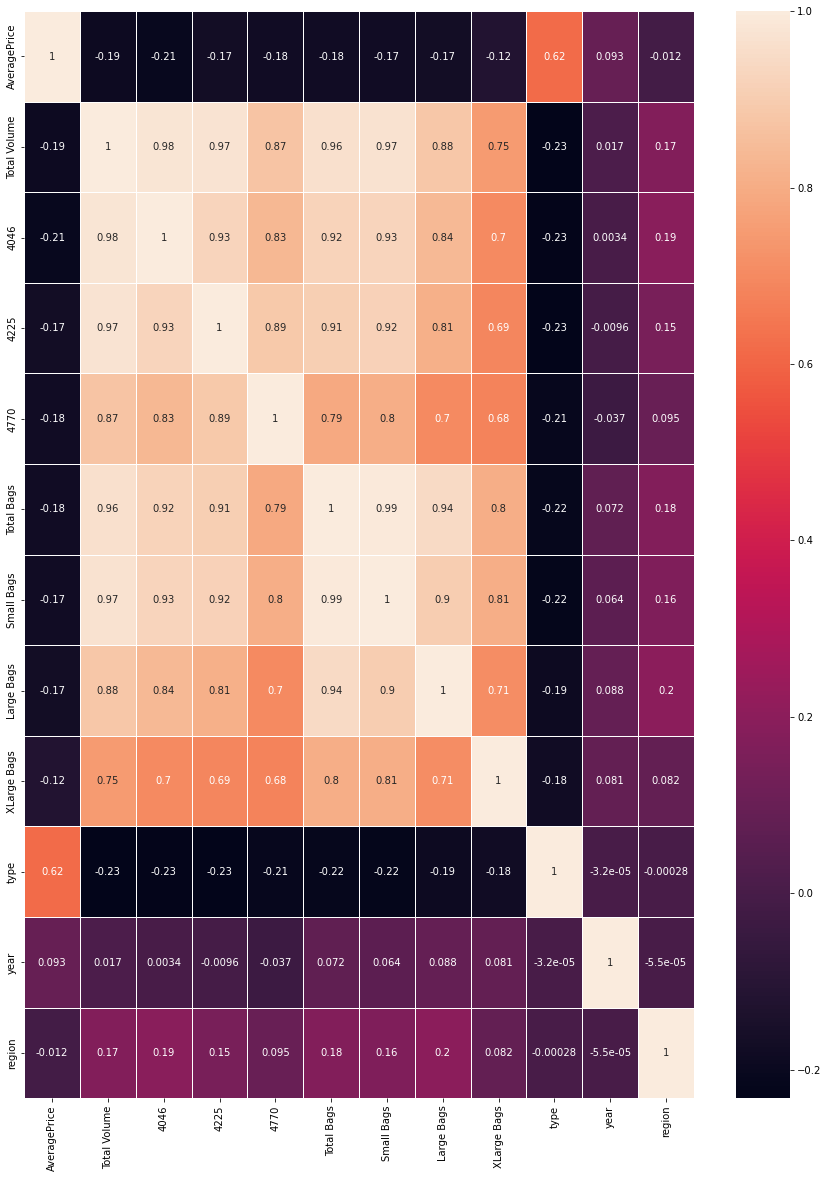

In [179]:
corr1=df1.corr()
plt.figure(figsize=(15,20))
sns.heatmap(data=corr1,annot=True,linewidths=0.5)

In [180]:
corr1['region'].sort_values(ascending=False)

region          1.000000
Large Bags      0.198768
4046            0.192073
Total Bags      0.175256
Total Volume    0.174176
Small Bags      0.164702
4225            0.145726
4770            0.095252
XLarge Bags     0.082281
year           -0.000055
type           -0.000280
AveragePrice   -0.011716
Name: region, dtype: float64

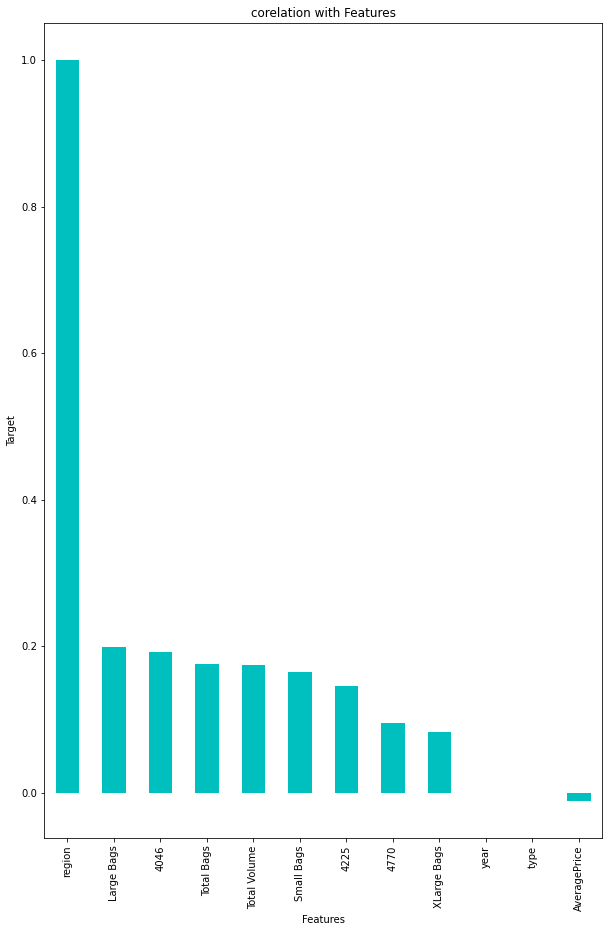

In [181]:
plt.figure(figsize=(10,15))
corr1['region'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('corelation with Features')
plt.show()

In [182]:
# Dropping the Unnecessary columns:
df1.drop(columns=['Date','year'],axis=1,inplace=True)
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53


AveragePrice        AxesSubplot(0.125,0.71587;0.227941x0.16413)
Total Volume     AxesSubplot(0.398529,0.71587;0.227941x0.16413)
4046             AxesSubplot(0.672059,0.71587;0.227941x0.16413)
4225               AxesSubplot(0.125,0.518913;0.227941x0.16413)
4770            AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Total Bags      AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Small Bags         AxesSubplot(0.125,0.321957;0.227941x0.16413)
Large Bags      AxesSubplot(0.398529,0.321957;0.227941x0.16413)
XLarge Bags     AxesSubplot(0.672059,0.321957;0.227941x0.16413)
type                  AxesSubplot(0.125,0.125;0.227941x0.16413)
region             AxesSubplot(0.398529,0.125;0.227941x0.16413)
dtype: object

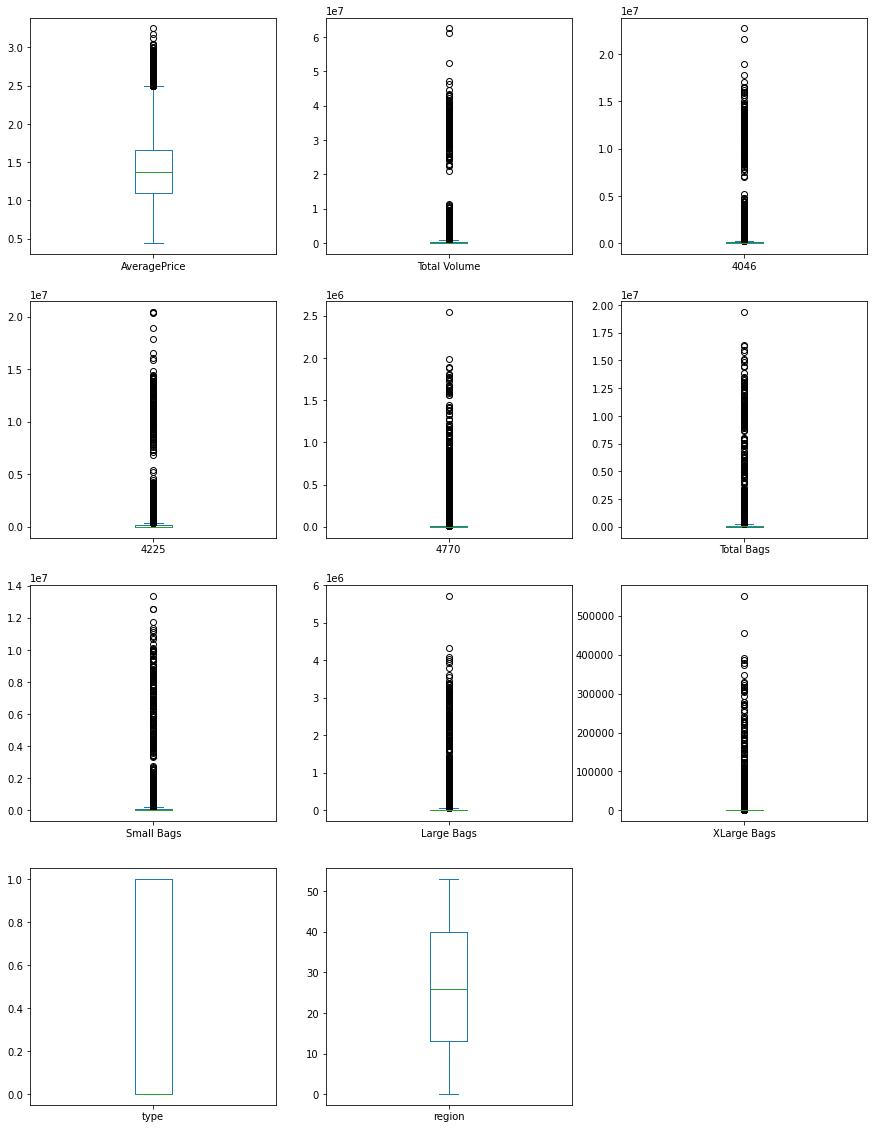

In [183]:
df1.plot(kind ='box', subplots =True , layout =(4,3), figsize = (15,20))

In [184]:
from scipy.stats import zscore
z = np.abs(zscore(df1))
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [185]:
df1_new=df1[(z<3).all(axis=1)]
df1_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53


AveragePrice        AxesSubplot(0.125,0.71587;0.227941x0.16413)
Total Volume     AxesSubplot(0.398529,0.71587;0.227941x0.16413)
4046             AxesSubplot(0.672059,0.71587;0.227941x0.16413)
4225               AxesSubplot(0.125,0.518913;0.227941x0.16413)
4770            AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Total Bags      AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Small Bags         AxesSubplot(0.125,0.321957;0.227941x0.16413)
Large Bags      AxesSubplot(0.398529,0.321957;0.227941x0.16413)
XLarge Bags     AxesSubplot(0.672059,0.321957;0.227941x0.16413)
type                  AxesSubplot(0.125,0.125;0.227941x0.16413)
region             AxesSubplot(0.398529,0.125;0.227941x0.16413)
dtype: object

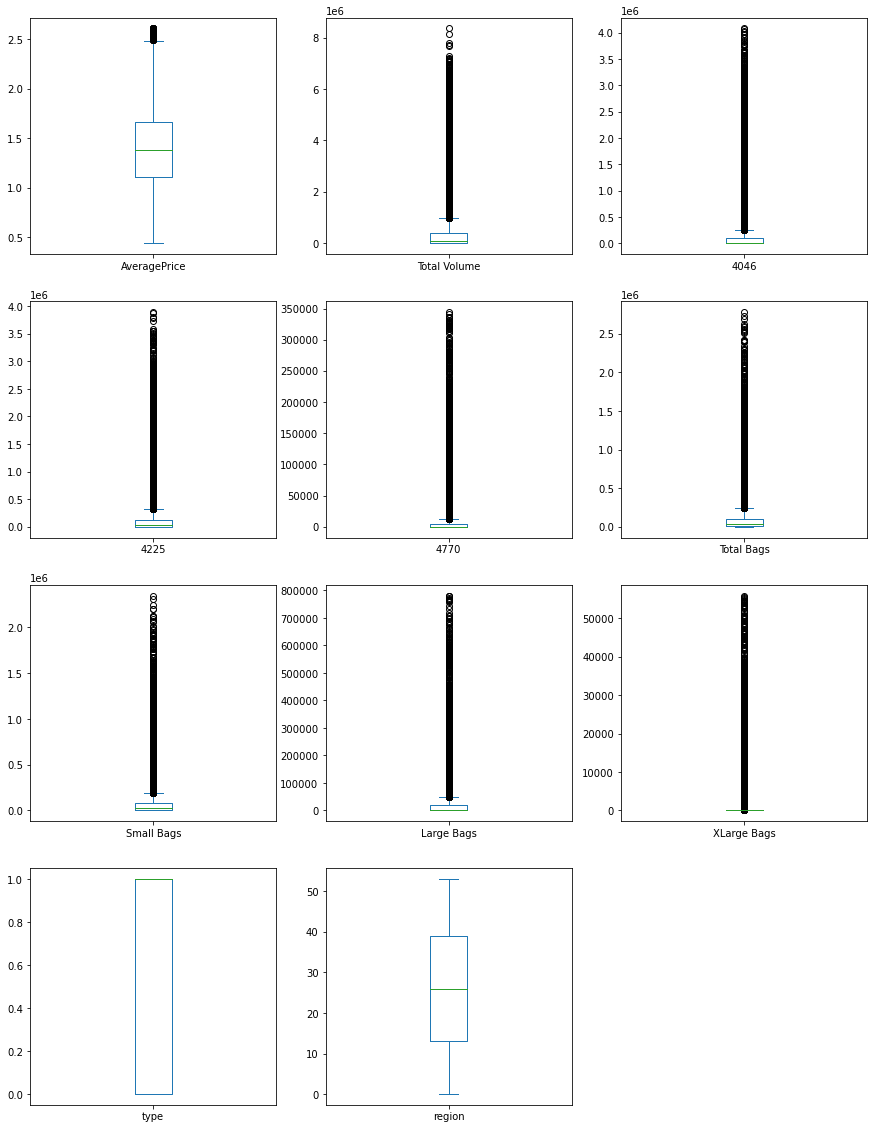

In [186]:
df1_new.plot(kind ='box', subplots =True , layout =(4,3), figsize = (15,20))# Rechecking the outliers after Zscore.

In [187]:
print("OldDataframerows =",df1.shape[0])
print("NewDataFramerows =",df1_new.shape[0])
print("Dataloss=",(df1.shape[0]-df1_new.shape[0])/df1.shape[0]*100)

OldDataframerows = 18249
NewDataFramerows = 17651
Dataloss= 3.276891884486821


# Skewness

In [188]:
df1_new.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
region          0.012798
dtype: float64

In [189]:
x=df1_new.drop(columns=['region'],axis=1)
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1


In [190]:
y=df1_new['region']
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17651, dtype: int32

In [191]:
x.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
dtype: float64

In [192]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
pwr=pt.fit_transform(x)
x_tra=pd.DataFrame(data=pwr,columns=x.columns)
# Checking skeweness and arranging the values in descending order
x_tra.skew().sort_values(ascending=False)

XLarge Bags     0.853758
4770            0.024168
AveragePrice    0.000464
Total Volume   -0.008642
Total Bags     -0.022204
Small Bags     -0.024405
type           -0.037741
4046           -0.039282
4225           -0.044675
Large Bags     -0.110913
dtype: float64

In [193]:
x=x_tra
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.019047
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.019047
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.019047
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.019047
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.019047
...,...,...,...,...,...,...,...,...,...,...
17646,0.639410,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919,0.981309
17647,0.826487,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919,0.981309
17648,1.184324,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919,0.981309
17649,1.313296,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919,0.981309


In [194]:
y.shape

(17651,)

# preprocessing

In [195]:
from sklearn.preprocessing import StandardScaler

In [196]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.11782446, -0.07532391, -0.65742071, ..., -0.78115255,
        -0.67791909, -1.01904715],
       [-0.06432986, -0.14749743, -0.77717852, ..., -0.77119787,
        -0.67791909, -1.01904715],
       [-1.29886469,  0.20555557, -0.7317763 , ..., -0.75852256,
        -0.67791909, -1.01904715],
       ...,
       [ 1.18432357, -0.77527398, -0.61796649, ..., -0.950743  ,
        -0.67791909,  0.98130886],
       [ 1.31329624, -0.70179733, -0.54701087, ..., -0.91606805,
        -0.67791909,  0.98130886],
       [ 0.61561867, -0.66738095, -0.35967077, ..., -1.04811619,
        -0.67791909,  0.98130886]])

# checking multicollinearity using VIF

In [197]:
vif1=pd.DataFrame()
vif1['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif1['Columns']=x.columns
vif1

,VIF,Columns
0,2.007102,AveragePrice
1,54.861187,Total Volume
2,6.823772,4046
3,12.141501,4225
4,3.784156,4770
5,34.820141,Total Bags
6,17.332756,Small Bags
7,3.441137,Large Bags
8,1.976077,XLarge Bags
9,4.111959,type


In [198]:
# Dropping the column['Total Volume']and['Total Bags']

In [199]:
x.drop(columns=['Total Volume','Total Bags'],axis=1,inplace=True)
x

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type
0,-0.117824,-0.657421,0.351430,-0.222566,-0.347421,-0.781153,-0.677919,-1.019047
1,-0.064330,-0.777179,0.269513,-0.175223,-0.311322,-0.771198,-0.677919,-1.019047
2,-1.298865,-0.731776,0.649333,0.023923,-0.374453,-0.758523,-0.677919,-1.019047
3,-0.829026,-0.632592,0.468799,-0.121164,-0.510991,-0.699123,-0.677919,-1.019047
4,-0.253635,-0.684504,0.262126,-0.110491,-0.490534,-0.607027,-0.677919,-1.019047
...,...,...,...,...,...,...,...,...
17646,0.639410,-0.462066,-0.926028,-1.228986,-0.175753,-0.412401,-0.677919,0.981309
17647,0.826487,-0.618019,-0.670600,-1.228986,-0.331971,-0.484991,-0.677919,0.981309
17648,1.184324,-0.617966,-0.778893,0.445710,-0.313756,-0.950743,-0.677919,0.981309
17649,1.313296,-0.547011,-0.716371,0.445399,-0.250408,-0.916068,-0.677919,0.981309


In [200]:
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.11782446, -0.65742071,  0.35142978, ..., -0.78115255,
        -0.67791909, -1.01904715],
       [-0.06432986, -0.77717852,  0.26951276, ..., -0.77119787,
        -0.67791909, -1.01904715],
       [-1.29886469, -0.7317763 ,  0.64933326, ..., -0.75852256,
        -0.67791909, -1.01904715],
       ...,
       [ 1.18432357, -0.61796649, -0.77889327, ..., -0.950743  ,
        -0.67791909,  0.98130886],
       [ 1.31329624, -0.54701087, -0.71637127, ..., -0.91606805,
        -0.67791909,  0.98130886],
       [ 0.61561867, -0.35967077, -0.79165015, ..., -1.04811619,
        -0.67791909,  0.98130886]])

In [201]:
vif1=pd.DataFrame() # checking VIF after columns removed
vif1['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif1['Columns']=x.columns
vif1

,VIF,Columns
0,1.838448,AveragePrice
1,3.531801,4046
2,4.185318,4225
3,3.767552,4770
4,3.572397,Small Bags
5,1.871636,Large Bags
6,1.962779,XLarge Bags
7,3.960287,type


# Model Building

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [203]:
lr=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("The Model Performs well")
        print("At Random State",i)
        print("The Training score is:",accuracy_score(y_train,pred_train)*100)
        print("The Test Score is :",accuracy_score(y_test,pred_test)*100)

The Model Performs well
At Random State 2
The Training score is: 47.78667472427859
The Test Score is : 47.99456152277362
The Model Performs well
At Random State 3
The Training score is: 47.69602659011936
The Test Score is : 47.90392023566735
The Model Performs well
At Random State 9
The Training score is: 47.83955280253815
The Test Score is : 47.56401540901881
The Model Performs well
At Random State 24
The Training score is: 47.71868862365916
The Test Score is : 47.58667573079538
The Model Performs well
At Random State 25
The Training score is: 48.02084907085663
The Test Score is : 47.92658055744391
The Model Performs well
At Random State 37
The Training score is: 47.205015863423476
The Test Score is : 47.292091547699975
The Model Performs well
At Random State 38
The Training score is: 47.975525003777
The Test Score is : 47.67731701790166
The Model Performs well
At Random State 39
The Training score is: 47.023719595105
The Test Score is : 46.92952639927487
The Model Performs well
At Ra

In [204]:
# choosing the Random state=96

In [205]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=96)

In [206]:
lr.fit(x_train,y_train)

LogisticRegression()

In [207]:
pred_test=lr.predict(x_test)
pred_test

array([15,  1,  7, ..., 39,  2, 17])

In [208]:
print("The model accuracy_score :",accuracy_score(y_test,pred_test)*100)

The model accuracy_score : 46.54430092907319


In [209]:
def model_selection(algorithm,x_train,x_test,y_train,y_test):
    algorithm.fit(x_train,y_train)
    pred_algo_train=algorithm.predict(x_train)
    pred_algo_test=algorithm.predict(x_test)
    print("The Accuracy score of the Model Training Data:",accuracy_score(y_train,pred_algo_train)*100)
    print("The Accuracy score of the Model Test Data:",accuracy_score(y_test,pred_algo_test)*100)
    print("The Classification report of the Model is :",classification_report(y_test,pred_algo_test))
    print("The Confusion Matrix is :",confusion_matrix(y_test,pred_algo_test))
   

In [210]:
# Training the Model with Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [211]:
dt=DecisionTreeClassifier()

In [212]:
model_selection(dt,x_train,x_test,y_train,y_test)

The Accuracy score of the Model Training Data: 100.0
The Accuracy score of the Model Test Data: 78.97122139134376
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.84      0.84      0.84        91
           1       0.72      0.79      0.75        80
           2       0.93      0.90      0.92        90
           3       0.74      0.75      0.75        88
           4       0.87      0.76      0.81        86
           5       0.76      0.65      0.70        83
           6       0.95      0.90      0.92        68
           7       0.80      0.82      0.81        77
           8       0.93      0.86      0.90        81
           9       0.74      0.81      0.77        83
          10       0.67      0.66      0.67        89
          11       0.86      0.90      0.88        97
          12       0.87      0.83      0.85        92
          13       0.69      0.77      0.73        82
          14       0.74      0.

In [213]:
# Training the Model with SVM Classifier

In [214]:
from sklearn.svm import  SVC

In [215]:
svc=SVC()

In [216]:
model_selection(svc,x_train,x_test,y_train,y_test)

The Accuracy score of the Model Training Data: 78.56927028252002
The Accuracy score of the Model Test Data: 76.97711307500566
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.73      0.95      0.82        91
           1       0.54      0.61      0.57        80
           2       0.95      0.91      0.93        90
           3       0.89      0.77      0.83        88
           4       0.83      0.67      0.74        86
           5       0.82      0.57      0.67        83
           6       0.97      0.99      0.98        68
           7       0.75      0.68      0.71        77
           8       0.95      0.95      0.95        81
           9       0.73      0.83      0.78        83
          10       0.54      0.66      0.60        89
          11       0.83      0.93      0.88        97
          12       0.90      0.95      0.92        92
          13       0.57      0.62      0.60        82
          14       

In [218]:
# Training the Model with K Neighbor Classifier.

In [219]:
from sklearn.neighbors import KNeighborsClassifier

In [220]:
knc=KNeighborsClassifier()

In [221]:
model_selection(knc,x_train,x_test,y_train,y_test)

The Accuracy score of the Model Training Data: 90.05136727602357
The Accuracy score of the Model Test Data: 83.93383186041243
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.86      0.91      0.88        91
           1       0.75      0.80      0.78        80
           2       0.97      0.94      0.96        90
           3       0.78      0.78      0.78        88
           4       0.86      0.86      0.86        86
           5       0.86      0.72      0.78        83
           6       0.96      0.97      0.96        68
           7       0.81      0.86      0.84        77
           8       0.94      0.95      0.94        81
           9       0.81      0.77      0.79        83
          10       0.67      0.72      0.69        89
          11       0.86      0.96      0.91        97
          12       0.92      0.91      0.92        92
          13       0.72      0.76      0.74        82
          14       

In [222]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [223]:
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

In [224]:
model_selection(rfc,x_train,x_test,y_train,y_test)

model_selection(gbc,x_train,x_test,y_train,y_test)

model_selection(ada,x_train,x_test,y_train,y_test)

The Accuracy score of the Model Training Data: 100.0
The Accuracy score of the Model Test Data: 90.34670292318151
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.92      0.95      0.93        91
           1       0.85      0.85      0.85        80
           2       0.97      0.99      0.98        90
           3       0.90      0.88      0.89        88
           4       0.92      0.95      0.94        86
           5       0.88      0.72      0.79        83
           6       0.96      0.99      0.97        68
           7       0.89      0.91      0.90        77
           8       0.97      0.96      0.97        81
           9       0.96      0.90      0.93        83
          10       0.80      0.88      0.84        89
          11       0.95      0.95      0.95        97
          12       0.97      0.98      0.97        92
          13       0.87      0.89      0.88        82
          14       0.87      0.

In [225]:
# Choosing Knc for hyper Tuning.

# Cross validation for all models.

In [227]:
from sklearn.model_selection import cross_val_score

In [229]:
print(cross_val_score(lr,x_scaled,y,cv=3))

[0.2182189  0.3132223  0.22080571]


In [230]:
print(cross_val_score(dt,x_scaled,y,cv=3))
  

[0.45241332 0.52277362 0.36562978]


In [231]:
print(cross_val_score(knc,x_scaled,y,cv=3))

[0.50696805 0.54996601 0.41900391]


In [232]:
print(cross_val_score(rfc,x_scaled,y,cv=3))

[0.59789259 0.64208022 0.47050824]


# Hyper Tuning Knc.

In [234]:
from sklearn .model_selection import GridSearchCV

In [235]:
parameters={'n_neighbors':[0,2,5],'weights':['uniform','distance']}

In [236]:
grd_knc=GridSearchCV(knc,param_grid=parameters)
grd_knc.fit(x_train,y_train)
print(grd_knc.best_params_)



{'n_neighbors': 2, 'weights': 'distance'}


In [237]:
knc_hyper=KNeighborsClassifier(n_neighbors= 2, weights= 'distance')

In [238]:
model_selection(knc_hyper,x_train,x_test,y_train,y_test)

The Accuracy score of the Model Training Data: 100.0
The Accuracy score of the Model Test Data: 86.24518468162248
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.87      0.82      0.85        91
           1       0.85      0.79      0.82        80
           2       0.98      0.94      0.96        90
           3       0.76      0.84      0.80        88
           4       0.85      0.93      0.89        86
           5       0.82      0.72      0.77        83
           6       0.96      0.97      0.96        68
           7       0.84      0.84      0.84        77
           8       0.96      0.95      0.96        81
           9       0.85      0.80      0.82        83
          10       0.78      0.72      0.75        89
          11       0.91      0.94      0.92        97
          12       0.92      0.93      0.93        92
          13       0.75      0.78      0.77        82
          14       0.86      0.

In [241]:
# Choosing the Default knc as final model and saving the Model.

In [247]:
import pickle
filename='avocado_classification.pkl'
pickle.dump(knc,open('avocado_classification.pkl','wb'))

In [249]:
loaded_model=pickle.load(open('avocado_classification.pkl','rb'))
loaded_model.score(x_test,y_test)*100

83.93383186041243

In [250]:
prediction=loaded_model.predict(x_test)
a=np.array(y_test)
predicted=np.array(prediction)
conclusion=pd.DataFrame({'Actual':a,'Prediction':predicted})
conclusion

,Actual,Prediction
0,15,15
1,48,48
2,7,7
3,5,49
4,41,26
...,...,...
4408,31,31
4409,4,4
4410,19,19
4411,2,2
